**Problem Statement**

> In a telco company, there are promotional costs known as Acquisition Cost and Retention Cost. Acquisition Cost is the cost for a company to acquire new customers. Meanwhile, Retention Cost is the cost for the company to retain existing customers.
> 
> Due to human limitations, we are often wrong to predict which customers will churn and which customers will retain. So that the allocation of funds can be wrong so that the funds issued become larger.
> 
> Moreover, according to some sources, the acquisition cost is 5x greater than the retantion cost. If we are wrong in predicting a customer who will actually churn, but it turns out that we predict as a customer who will retain, then we need to spend more than it should be.

**What to do**

> I will try to create a Machine Learning model to predict customer churn and retantion.

**Goal**

> Machine Learning has a goal so that cost allocation can be done as precisely as possible.

**Value**

> There is no wasted cost allocation.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectPercentile, univariate_selection, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedStratifiedKFold,\
StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
import category_encoders as ce
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.univariate_selection module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx


In [2]:
telco = pd.read_excel('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')

In [3]:
telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
telco.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [7]:
report(telco)

,Column,d_type,unique_sample,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


Initially I will try to make a brief report on this data. From this report I will determine which columns to delete.

From the dataframe above, there are several columns that have one unique value, namely the column [Count, Country, State]. In addition, I will not use the CustomerID column because the customerID does not determine the probability that someone will churn or not.

Zip code, Lat Long, Latitude, Longitude will also be deleted. I won't use it to build Machine Learning.

I will delete Churn Score and Churn Reason in the end, because this will leak information for the model later. But for now, I will use it just for looking some insights.

In [8]:
# one time run
new_col = telco.columns.str.replace(' ', '_')
telco.columns = new_col

In [9]:
telco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip_Code',
       'Lat_Long', 'Latitude', 'Longitude', 'Gender', 'Senior_Citizen',
       'Partner', 'Dependents', 'Tenure_Months', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method',
       'Monthly_Charges', 'Total_Charges', 'Churn_Label', 'Churn_Value',
       'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

In [10]:
telco.drop('CustomerID Count City Country State Zip_Code Lat_Long Latitude Longitude'.split(), axis=1, inplace=True)

# __EDA__

In [11]:
telco.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [12]:
telco.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Label',
       'Churn_Value', 'Churn_Score', 'CLTV', 'Churn_Reason'],
      dtype='object')

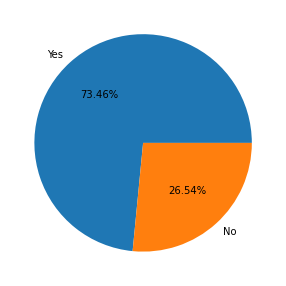

In [13]:
plt.figure(figsize=(10,5))
plt.pie(telco['Churn_Label'].value_counts(), labels=telco['Churn_Label'].unique(), autopct='%.2f%%')
plt.show()

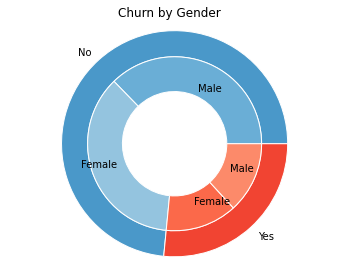

In [14]:
by_gender = telco.groupby('Churn_Label')['Gender'].value_counts().to_frame().rename(columns={'Gender': 'Freq'}).reset_index().sort_values('Churn_Label')

# Make data: I have 3 groups and 7 subgroups
group_names=telco['Churn_Label'].value_counts().index
group_size=telco['Churn_Label'].value_counts()
subgroup_names=by_gender['Gender']
subgroup_size=by_gender['Freq']
 
# Create colors
a, b =[plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
fig.suptitle('Churn by Gender')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()


In [15]:
telco.groupby('Churn_Label')['Gender'].value_counts(normalize=True).to_frame().rename(columns={'Gender': 'Ratio'}).reset_index().sort_values('Churn_Label')

,Churn_Label,Gender,Ratio
0,No,Male,0.507344
1,No,Female,0.492656
2,Yes,Female,0.502408
3,Yes,Male,0.497592


**Note:** From the visualization above, we can see that, the proportion for male and female to churn or retain is almost the same.

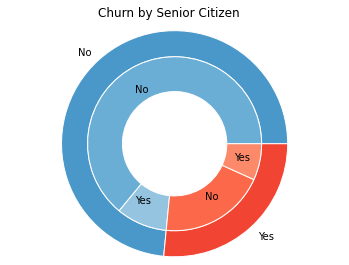

In [16]:
by_senior = telco.groupby('Churn_Label')['Senior_Citizen'].value_counts().to_frame().rename(columns={'Senior_Citizen': 'Freq'}).reset_index().sort_values('Churn_Label')

# Make data: I have 3 groups and 7 subgroups
group_names=telco['Churn_Label'].value_counts().index
group_size=telco['Churn_Label'].value_counts()
subgroup_names=by_senior['Senior_Citizen']
subgroup_size=by_senior['Freq']
 
# Create colors
a, b =[plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
fig.suptitle('Churn by Senior Citizen')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

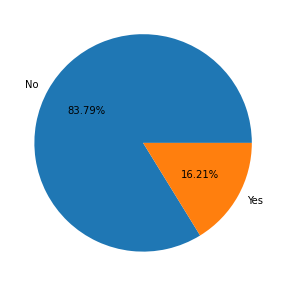

In [17]:
plt.figure(figsize=(10,5))
plt.pie(telco['Senior_Citizen'].value_counts(), labels=telco['Senior_Citizen'].unique(), autopct='%.2f%%')
plt.show()

In [18]:
telco['Senior_Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior_Citizen, dtype: int64

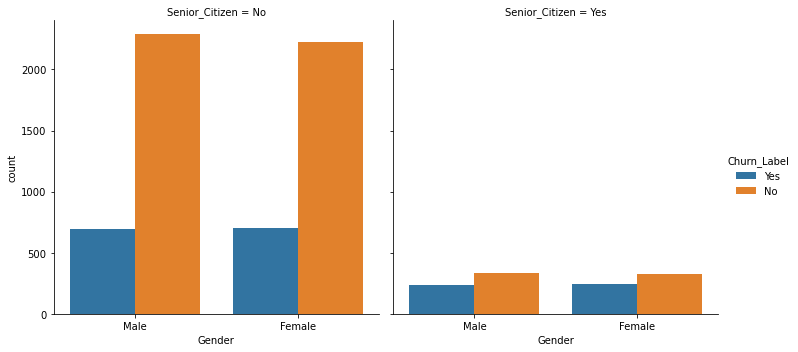

In [19]:
sns.catplot(x='Gender', hue='Churn_Label', col='Senior_Citizen', kind='count', data=telco)

In [20]:
by_gender_senior = telco.groupby(['Senior_Citizen', 'Gender'])['Churn_Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Label': 'Ratio'}).reset_index().sort_values('Senior_Citizen')
by_gender_senior

,Senior_Citizen,Gender,Churn_Label,Ratio
0,No,Female,No,0.760616
1,No,Female,Yes,0.239384
2,No,Male,No,0.767192
3,No,Male,Yes,0.232808
4,Yes,Female,No,0.577465
5,Yes,Female,Yes,0.422535
6,Yes,Male,No,0.588850
7,Yes,Male,Yes,0.411150


**Note:** From the visualization above, we can see that the churn and retain ratio for senior citizens, both male and female, is almost the same. Likewise, the churn and retain ratio for non-senior citizens. But if we look, the churn ratio has increased in senior citizens when compared to non-senior citizens.

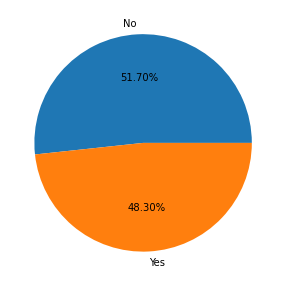

In [21]:
plt.figure(figsize=(10,5))
plt.pie(telco['Partner'].value_counts(), labels=telco['Partner'].unique(), autopct='%.2f%%')
plt.show()

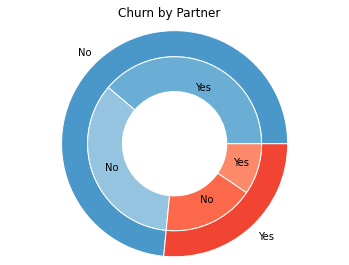

In [22]:
by_partner = telco.groupby('Churn_Label')['Partner'].value_counts().to_frame().rename(columns={'Partner': 'Freq'}).reset_index().sort_values('Churn_Label')

# Make data: I have 3 groups and 7 subgroups
group_names=telco['Churn_Label'].value_counts().index
group_size=telco['Churn_Label'].value_counts()
subgroup_names=by_partner['Partner']
subgroup_size=by_partner['Freq']
 
# Create colors
a, b =[plt.cm.Blues, plt.cm.Reds]
 
# First Ring (outside)
fig, ax = plt.subplots()
fig.suptitle('Churn by Partner')
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6)])
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

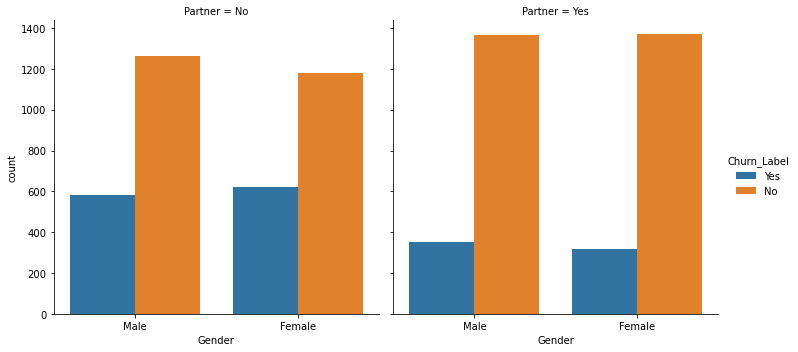

In [23]:
sns.catplot(x='Gender', hue='Churn_Label', col='Partner', kind='count', data=telco)
plt.show()

In [24]:
by_gender_partner = telco.groupby(['Partner', 'Gender'])['Churn_Label'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Label': 'Ratio'}).reset_index().sort_values('Partner')
by_gender_partner

,Partner,Gender,Churn_Label,Ratio
0,No,Female,No,0.655556
1,No,Female,Yes,0.344444
2,No,Male,No,0.684954
3,No,Male,Yes,0.315046
4,Yes,Female,No,0.811019
5,Yes,Female,Yes,0.188981
6,Yes,Male,No,0.795799
7,Yes,Male,Yes,0.204201


From the visualization above, both female and male who do not have a partner are more likely to churn.

In [25]:
by_gp = telco.groupby(['Partner', 'Gender', 'Churn_Label'])
by_gp_mc = by_gp['Monthly_Charges'].mean().to_frame().reset_index().sort_values('Partner')
by_gp_mc_no = by_gp_mc[by_gp_mc['Partner'] == 'No']
by_gp_mc_yes = by_gp_mc[by_gp_mc['Partner'] == 'Yes']

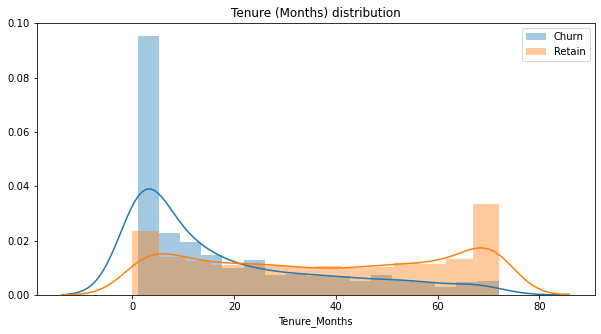

In [26]:
plt.figure(figsize=(10,5))
plt.title('Tenure (Months) distribution')
sns.distplot(telco[telco['Churn_Label'] == 'Yes']['Tenure_Months'], label='Churn')
sns.distplot(telco[telco['Churn_Label'] == 'No']['Tenure_Months'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

**Note:** From the visualization above, we can see that, the longer a person uses the provider, the probability of churn decreases.

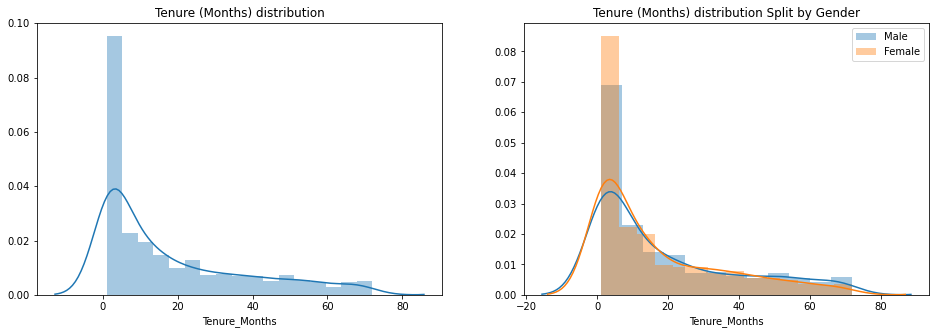

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Tenure (Months) distribution')
sns.distplot(telco[telco['Churn_Label'] == 'Yes']['Tenure_Months'], label='Churn')
plt.subplot(1,2,2)
plt.title('Tenure (Months) distribution Split by Gender')
sns.distplot(telco[(telco['Churn_Label'] == 'Yes') & (telco['Gender'] == 'Male')]['Tenure_Months'], label='Male')
sns.distplot(telco[(telco['Churn_Label'] == 'Yes') & (telco['Gender'] == 'Female')]['Tenure_Months'], label='Female')
plt.legend()
plt.show()

**Note:** From the visualization above, most female users whose subscription period is less than 10 months, will be more likely to churn than male. However, the longer the subscription period, male are more likely to churn than female.

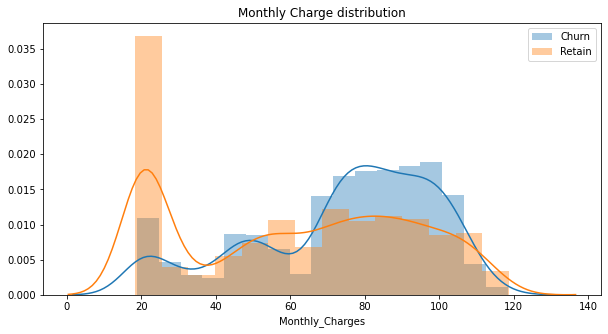

In [28]:
plt.figure(figsize=(10,5))
plt.title('Monthly Charge distribution')
sns.distplot(telco[telco['Churn_Label'] == 'Yes']['Monthly_Charges'], label='Churn')
sns.distplot(telco[telco['Churn_Label'] == 'No']['Monthly_Charges'], label='Retain')
plt.legend(loc= 'upper right')
plt.show()

**Note:** From the visualization above, customers who make transactions per month on average more than $ 60, will be more likely to churn than the average transaction below that.

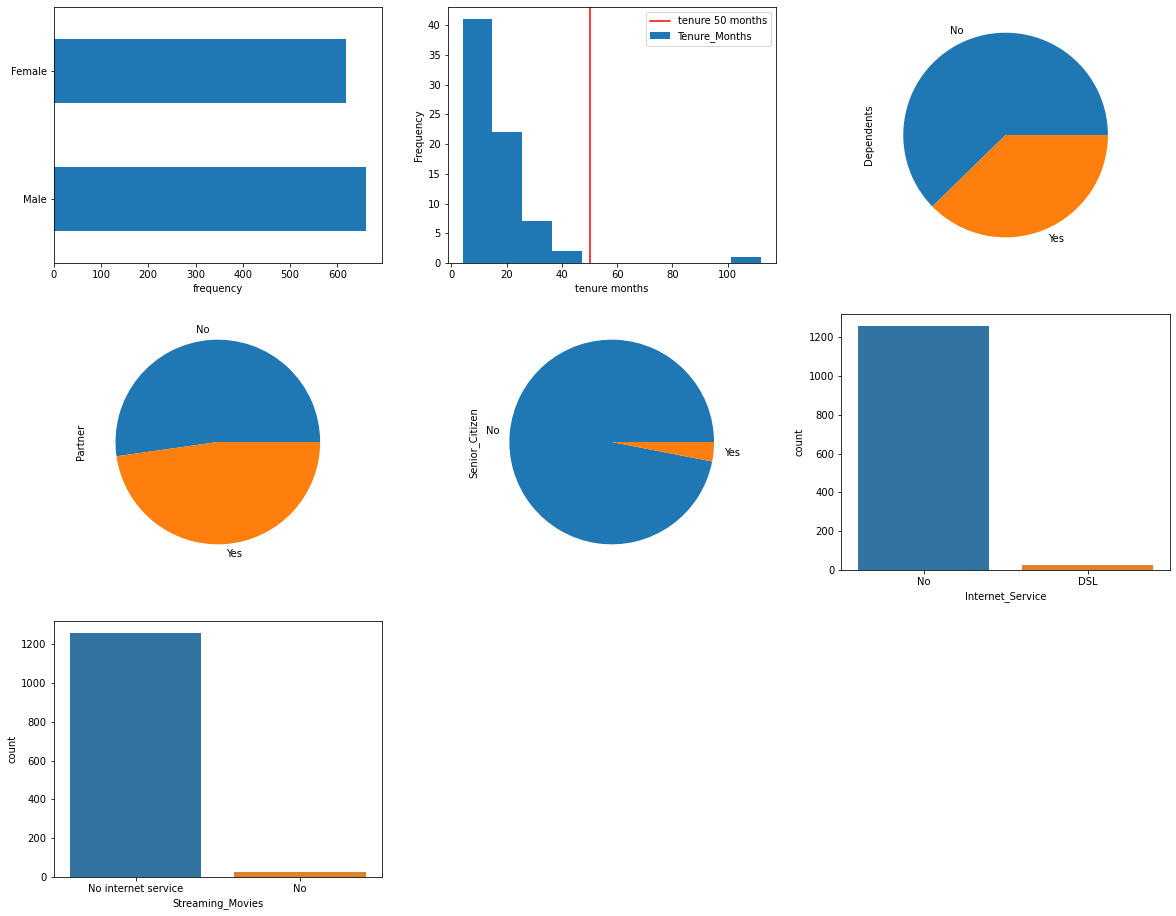

In [29]:
plt.figure(figsize=(20,16))
plt.subplot(331)
telco[(telco['Monthly_Charges'] <= 25) & (telco['Churn_Value']==0)]['Gender'].value_counts().plot(kind='barh')
plt.xlabel('frequency')
plt.subplot(332)
telco[(telco['Monthly_Charges'] <= 25) & (telco['Churn_Value']==0)]['Tenure_Months'].value_counts().plot(kind='hist')
plt.axvline(50, label='tenure 50 months', color='red')
plt.legend()
plt.xlabel('tenure months')
plt.subplot(333)
telco[(telco['Monthly_Charges'] <= 25) & (telco['Churn_Value']==0)]['Dependents'].value_counts().plot(kind='pie')
plt.subplot(334)
telco[(telco['Monthly_Charges'] <= 25) & (telco['Churn_Value']==0)]['Partner'].value_counts().plot(kind='pie')
plt.subplot(335)
telco[(telco['Monthly_Charges'] <= 25) & (telco['Churn_Value']==0)]['Senior_Citizen'].value_counts().plot(kind='pie')
plt.subplot(336)
internet_service_df = telco[(telco['Monthly_Charges'] <= 25) & (telco['Churn_Value']==0)]['Internet_Service']
sns.countplot(internet_service_df)
plt.subplot(337)
streaming_movie_df = telco[(telco['Monthly_Charges'] <= 25) & (telco['Churn_Value']==0)]['Streaming_Movies']
sns.countplot(streaming_movie_df)

There is a peak for customer retainers whose monthly charge is around 20 dollars. From the visualization above, we can see that the majority of customers whose monthly charges are still around 20 dollars are customers with tenure months of under 50 months. Most of them are Non-Senior Citizens. They don't have an internet access and haven't subscribed to many products from the provider.

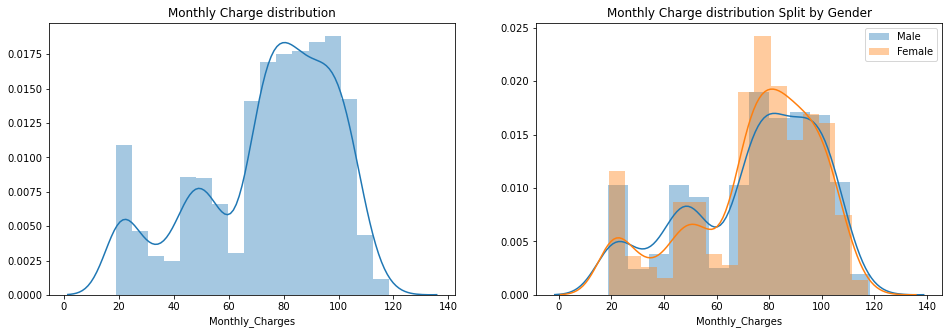

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Monthly Charge distribution')
sns.distplot(telco[telco['Churn_Label'] == 'Yes']['Monthly_Charges'], label='Churn')
plt.subplot(1,2,2)
plt.title('Monthly Charge distribution Split by Gender')
sns.distplot(telco[(telco['Churn_Label'] == 'Yes') & (telco['Gender'] == 'Male')]['Monthly_Charges'], label='Male')
sns.distplot(telco[(telco['Churn_Label'] == 'Yes') & (telco['Gender'] == 'Female')]['Monthly_Charges'], label='Female')
plt.legend()
plt.show()

**Note:** From the visualization above, the odds between men and women to churn is almost the same in every level of monthly charges.

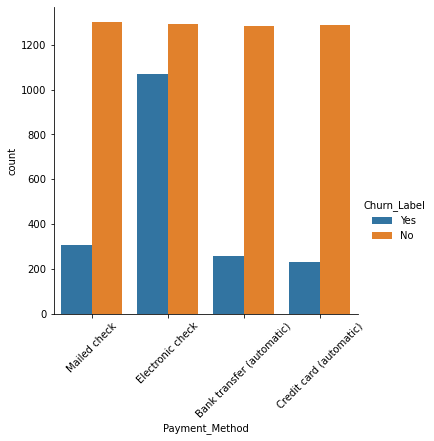

In [31]:
sns.catplot(x='Payment_Method', hue='Churn_Label', kind='count', data=telco)
plt.xticks(rotation=45)
plt.show()

In [32]:
pd.crosstab(telco['Payment_Method'], telco['Churn_Label'], normalize=0)

Churn_Label,No,Yes
Payment_Method,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [33]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [34]:
telco['Total_Charges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
           ..
6747.35     1
266.95      1
6751.35     1
740         1
4749.15     1
Name: Total_Charges, Length: 6531, dtype: int64

In [35]:
telco['Total_Charges'].replace(' ', np.nan, inplace=True)

In [36]:
telco['Total_Charges'].value_counts()

20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
1673.80     1
434.10      1
5958.85     1
572.20      1
2610.65     1
Name: Total_Charges, Length: 6530, dtype: int64

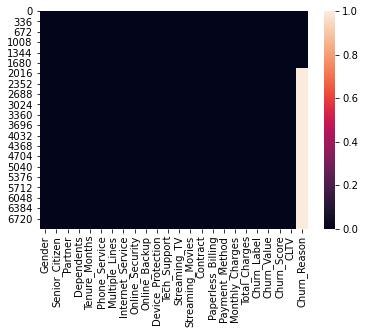

In [37]:
sns.heatmap(telco.isna())

In [38]:
pd.crosstab(telco['Payment_Method'], telco['Churn_Label'], values=telco['Total_Charges'], aggfunc=np.mean)

Churn_Label,No,Yes
Payment_Method,,
Bank transfer (automatic),3241.953388,2269.812984
Credit card (automatic),3201.189721,2350.257759
Electronic check,2609.989838,1463.656769
Mailed check,1178.173804,534.022565


## Modelling

For the modeling stage, this churn prediction will focus on as much as possible in predicting which customers will churn. As we know, if this model predicts 'retain' for a customer that will actually 'churn', then we will lose the customer. And according to some opinions, the cost of customer acquisition is 5 times greater than the cost of retaining the customer.

So that in modeling this time we will focus on recall. And we will try to use PR (Precision Recall) Curve to find the optimal threshold.

In [39]:
telco.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Reason
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [40]:
telco2 = telco.drop(['Churn_Label', 'Churn_Score', 'CLTV', 'Churn_Reason'], axis=1).copy()

In [41]:
telco2[['Monthly_Charges', 'Total_Charges']].corr()

,Monthly_Charges,Total_Charges
Monthly_Charges,1.000000,0.651065
Total_Charges,0.651065,1.000000


We can see that there is a high correlation between monthly charges and total charges. We can do PCA in these two columns.

In [42]:
summary_df = report(telco2)
one_hot_cols = summary_df[summary_df['d_type']=='object']['Column']

In [43]:
summary_df

,Column,d_type,unique_sample,n_uniques
0,Gender,object,"[Male, Female]",2
1,Senior_Citizen,object,"[No, Yes]",2
2,Partner,object,"[No, Yes]",2
3,Dependents,object,"[No, Yes]",2
4,Tenure_Months,int64,"[2, 8, 28, 49, 10]",73
5,Phone_Service,object,"[Yes, No]",2
6,Multiple_Lines,object,"[No, Yes, No phone service]",3
7,Internet_Service,object,"[DSL, Fiber optic, No]",3
8,Online_Security,object,"[Yes, No, No internet service]",3
9,Online_Backup,object,"[Yes, No, No internet service]",3


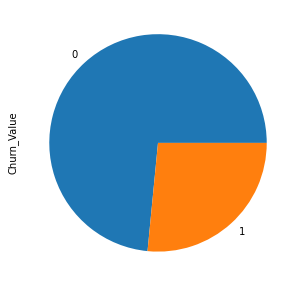

In [44]:
telco2['Churn_Value'].value_counts(normalize=True).plot(kind='pie', figsize=(5,5))

In [45]:
X = telco2.drop(columns='Churn_Value')
y = telco2['Churn_Value']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=.2, stratify=y)

In [46]:
logit = LogisticRegression(random_state=2021)
rfc = RandomForestClassifier(max_depth=10)
knn = KNeighborsClassifier(n_neighbors=5)
smote = SMOTE()

## Pipeline For LogisticRegression

In [47]:
telco2.head(1)

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [48]:
telco2.isna().sum()/len(telco2)*100

Gender               0.000000
Senior_Citizen       0.000000
Partner              0.000000
Dependents           0.000000
Tenure_Months        0.000000
Phone_Service        0.000000
Multiple_Lines       0.000000
Internet_Service     0.000000
Online_Security      0.000000
Online_Backup        0.000000
Device_Protection    0.000000
Tech_Support         0.000000
Streaming_TV         0.000000
Streaming_Movies     0.000000
Contract             0.000000
Paperless_Billing    0.000000
Payment_Method       0.000000
Monthly_Charges      0.000000
Total_Charges        0.156183
Churn_Value          0.000000
dtype: float64

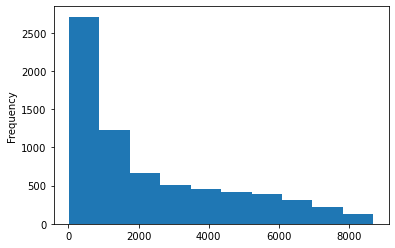

In [49]:
telco2['Total_Charges'].plot(kind='hist')

In [50]:
test, pval = stats.shapiro(telco2['Total_Charges'])

if pval < 0.05:
    print('normal')
else:
    print('not normal')

not normal


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [51]:
# for monthly and total charges
logit_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])

# for all object columns
logit_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
logit_transformer = ColumnTransformer([
    ('pipe_num', logit_pipe_num, ['Monthly_Charges', 'Total_Charges']),
    ('pipe_cat', logit_pipe_cat, one_hot_cols)
])

# combine all pipeline
logit_pipe_combine = Pipeline([
    ('transformer', logit_transformer),
    ('rfe', RFE(logit)),
    ('resampling', smote),
    ('logit', logit)
])

## Pipeline For RandomForestClassifier

In [52]:
# for monthly and total charges
rfc_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])

# for all object columns
rfc_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_num', rfc_pipe_num, ['Monthly_Charges', 'Total_Charges']),
    ('pipe_cat', rfc_pipe_cat, one_hot_cols)
])

# combine all pipeline
rfc_pipe_combine = Pipeline([
    ('transformer', rfc_transformer),
    ('rfe', RFE(rfc)),
    ('resampling', smote),
    ('rfc', rfc)
])

## Pipeline For KNeighborsClassifier

In [53]:
# for monthly and total charges
knn_pipe_num = Pipeline([
    ('imputer', SimpleImputer(strategy='median', missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=1))
])

# for all object columns
knn_pipe_cat = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
])

# transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_num', knn_pipe_num, ['Monthly_Charges', 'Total_Charges']),
    ('pipe_cat', knn_pipe_cat, one_hot_cols)
])

# combine all pipeline
knn_pipe_combine = Pipeline([
    ('transformer', knn_transformer),
    ('resampling', smote),
    ('knn', knn)
])

In [54]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [55]:
rskf = RepeatedStratifiedKFold(n_splits=5, random_state=2021)

logit_score = cross_val_score(logit_pipe_combine, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(rfc_pipe_combine, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
knn_score = cross_val_score(knn_pipe_combine, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.2s finished


In [56]:
print('Logit Val Score:', logit_score)
print('RFC Val Score:', rfc_score)
print('KNN Val Score:', knn_score)

Logit Val Score: [0.77591973 0.80267559 0.7993311  0.76588629 0.79264214 0.76254181
 0.78595318 0.8361204  0.7993311  0.78595318 0.79598662 0.76923077
 0.78929766 0.7993311  0.7993311  0.7458194  0.81605351 0.79264214
 0.80936455 0.78595318 0.81270903 0.7993311  0.77591973 0.76588629
 0.81270903 0.78929766 0.77926421 0.77926421 0.80267559 0.80267559
 0.81939799 0.79598662 0.7826087  0.78595318 0.79598662 0.81605351
 0.79264214 0.77926421 0.7993311  0.79264214 0.79264214 0.75919732
 0.80267559 0.82274247 0.80936455 0.75919732 0.79598662 0.7993311
 0.75919732 0.84949833]
RFC Val Score: [0.73578595 0.74247492 0.7458194  0.74916388 0.75250836 0.71571906
 0.70234114 0.76923077 0.74916388 0.7458194  0.76254181 0.69899666
 0.71571906 0.73578595 0.74247492 0.73244147 0.77591973 0.72240803
 0.75585284 0.74916388 0.76588629 0.74916388 0.71237458 0.68561873
 0.7458194  0.7458194  0.72575251 0.73578595 0.73913043 0.7826087
 0.73913043 0.75585284 0.73244147 0.76588629 0.76923077 0.7458194
 0.725752

In [57]:
print('Logit Val Score:', logit_score.mean())
print('RFC Val Score:', rfc_score.mean())
print('KNN Val Score:', knn_score.mean())

Logit Val Score: 0.7927759197324415
RFC Val Score: 0.7407357859531771
KNN Val Score: 0.7382608695652175


In [58]:
logit_pipe_combine.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler()),
                                                    ('pca', PCA(n_components=1))]),
                                    ['Monthly_Charges', 'Total_Charges']),
                                   ('pipe_cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(drop='first'))]),
                                    0                Gender
   1        Senior_Citizen
   2               Partner
   3            Dependents
   5         Phone_Service
   6        Multiple_Lines
   7      Internet_Service
   8       Online_Security
   9         Online_Backup
   10    Device_Protection
   11         Te

In [59]:
rfc_pipe_combine.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler()),
                                                    ('pca', PCA(n_components=1))]),
                                    ['Monthly_Charges', 'Total_Charges']),
                                   ('pipe_cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(drop='first'))]),
                                    0                Gender
   1        Senior_Citizen
   2               Partner
   3            Dependents
   5         Phone_Service
   6        Multiple_Lines
   7      Internet_Service
   8       Online_Security
   9         Online_Backup
   10    Device_Protection
   11         Te

In [60]:
knn_pipe_combine.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_num',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', StandardScaler()),
                                                    ('pca', PCA(n_components=1))]),
                                    ['Monthly_Charges', 'Total_Charges']),
                                   ('pipe_cat',
                                    Pipeline(steps=[('onehot',
                                                     OneHotEncoder(drop='first'))]),
                                    0                Gender
   1        Senior_Citizen
   2               Partner
   3            Dependents
   5         Phone_Service
   6        Multiple_Lines
   7      Internet_Service
   8       Online_Security
   9         Online_Backup
   10    Device_Protection
   11         Te

In [61]:
logit_params = {
    'logit__C': np.linspace(0,1,10),
    'logit__solver': ['lbfgs', 'liblinear', 'newton-cg'],
    'transformer__pipe_num__imputer__strategy': ['median', 'mean']
}

rfc_params = {
    'rfc__max_depth': np.arange(10,16),
    'rfc__min_samples_split': np.arange(7,10),
    'transformer__pipe_num__imputer__strategy': ['median', 'mean']
}

knn_params = {
    'knn__n_neighbors': np.arange(3,8),
    'transformer__pipe_num__imputer__strategy': ['median', 'mean']
}

In [63]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
logit_grid = GridSearchCV(logit_pipe_combine, param_grid=logit_params, scoring='recall', cv=skf, verbose=1, n_jobs=-1)
logit_grid.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   57.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=1))]),
                                                                         ['Monthly_Charges',
                                              

In [64]:
logit_tuned = logit_grid.best_estimator_
logit_tuned_score = cross_val_score(logit_tuned, X_train_val, y_train_val, scoring='recall', cv=rskf, n_jobs=-1, verbose=1)
logit_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    9.4s finished


array([0.77591973, 0.80267559, 0.7993311 , 0.76254181, 0.79264214,
       0.7458194 , 0.79264214, 0.8361204 , 0.79598662, 0.78595318,
       0.80936455, 0.77257525, 0.78929766, 0.79598662, 0.79264214,
       0.74916388, 0.81939799, 0.78595318, 0.81270903, 0.81270903,
       0.81270903, 0.80267559, 0.77591973, 0.76254181, 0.81270903,
       0.78929766, 0.77591973, 0.77926421, 0.80602007, 0.81939799,
       0.80267559, 0.79264214, 0.78929766, 0.77926421, 0.79598662,
       0.82274247, 0.80602007, 0.7826087 , 0.80267559, 0.79598662,
       0.78595318, 0.75250836, 0.7993311 , 0.81939799, 0.81270903,
       0.76588629, 0.79598662, 0.80602007, 0.75585284, 0.84280936])

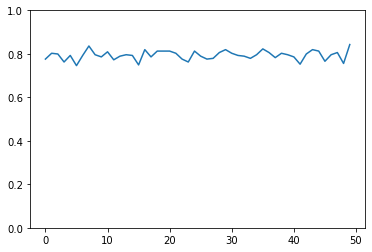

In [65]:
plt.plot(np.arange(len(logit_tuned_score)), logit_tuned_score)
plt.ylim(0,1)
plt.show()

In [66]:
logit_tuned_score.mean() # tuned dari cross val score

0.7934448160535118

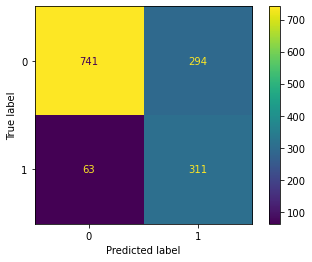

In [67]:
logit_tuned.fit(X_train_val, y_train_val)
plot_confusion_matrix(logit_tuned, X_test, y_test)

In [68]:
logit_score.mean() #benchmark hasil dari cross val score

0.7927759197324415

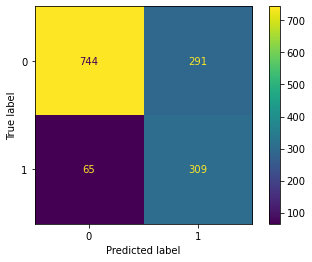

In [69]:
logit_pipe_combine.fit(X_train_val, y_train_val)
plot_confusion_matrix(logit_pipe_combine, X_test, y_test)

There is a very small increase in the recall score. We will try to continue to find the best threshold using the tuned Logistic Regression.

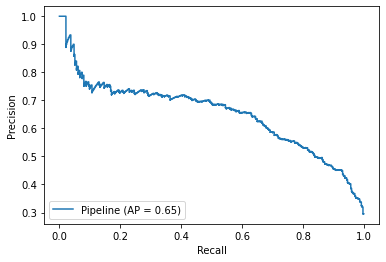

In [70]:
plot_precision_recall_curve(logit_tuned, X_test, y_test)

In [71]:
p, r, t = precision_recall_curve(y_test, logit_tuned.predict_proba(X_test)[:,1])
len(p[:-1]), len(r[:-1]), len(t)
pr_df = pd.DataFrame({'precision': p[:-1], 'recall': r[:-1], 'threshold': t})
pr_df

,precision,recall,threshold
0,0.295652,1.000000,0.045850
1,0.295095,0.997326,0.046220
2,0.295329,0.997326,0.046262
3,0.295563,0.997326,0.046481
4,0.295797,0.997326,0.046715
...,...,...,...
1257,1.000000,0.013369,0.926928
1258,1.000000,0.010695,0.936369
1259,1.000000,0.008021,0.940978
1260,1.000000,0.005348,0.941276


In [72]:
pr_df[(pr_df['recall'].between(0.8, 0.91)) & (pr_df['precision'].between(0.43, 0.5))].head(20)

,precision,recall,threshold
510,0.450331,0.909091,0.340221
511,0.450928,0.909091,0.340586
512,0.451527,0.909091,0.340633
513,0.452128,0.909091,0.341275
514,0.451398,0.906417,0.341341
515,0.452000,0.906417,0.342184
516,0.452603,0.906417,0.343677
517,0.453209,0.906417,0.344336
518,0.453815,0.906417,0.346943
519,0.454424,0.906417,0.347451


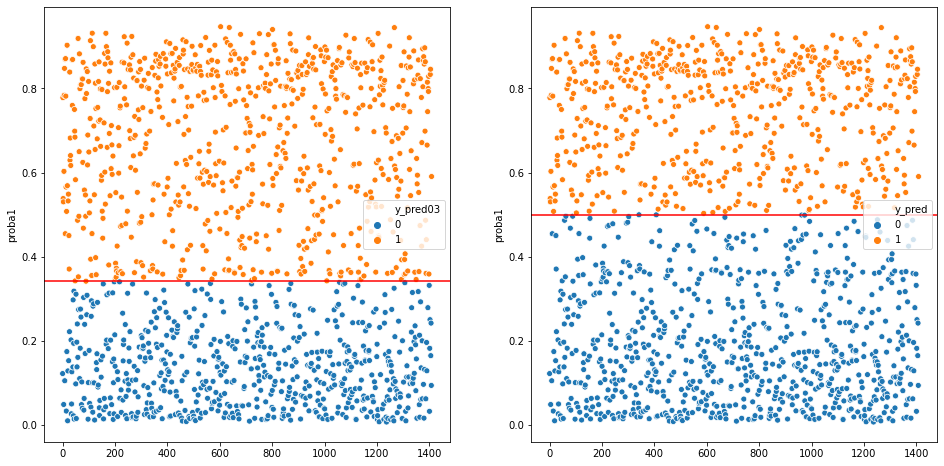

In [79]:
proba1 = logit_tuned.predict_proba(X_test)[:,1]
y_pred = logit_tuned.predict(X_test)
thresh =0.341275
pred_03 = np.where(proba1 > thresh, 1, 0)
res_df = pd.DataFrame({'proba1': proba1, 'y_pred': y_pred, 'y_pred03': pred_03})
plt.figure(figsize=(16,8))
plt.subplot(121)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred03'])
plt.axhline(thresh, color='red')

plt.subplot(122)
sns.scatterplot(x=range(len(res_df)), y=res_df['proba1'], hue=res_df['y_pred'])
plt.axhline(0.5, color='red')

# Final Result

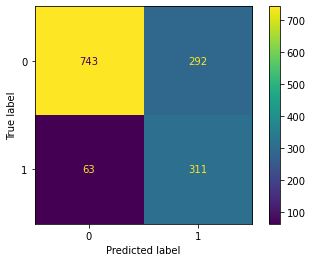

In [80]:
logit_pipe_combine.fit(X_train_val, y_train_val)
plot_confusion_matrix(logit_pipe_combine, X_test, y_test)

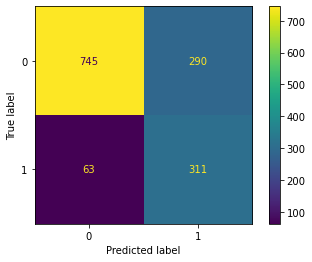

In [81]:
logit_tuned.fit(X_train_val, y_train_val)
plot_confusion_matrix(logit_tuned, X_test, y_test)

In [82]:
print("Customer who don't get a treatment and run away:", round(63/(745+63)*100,2),"%")
print("Customer who get a treatment but actually still with us:", round(290/(290+311)*100,2),"%")

Customer who don't get a treatment and run away: 7.8 %
Customer who get a treatment but actually still with us: 48.25 %


In [84]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [85]:
make_conf_matrix(confusion_matrix(y_test, pred_03))

,p_0,p_1,total_actual
a_0,621,414,1035
a_1,31,343,374
total_prediction,652,757,1409


In [86]:
print("Customer who don't get a treatment and run away:", round(31/(621+31)*100,2),"%")
print("Customer who get a treatment but actually still with us:", round(414/(414+343)*100,2),"%")

Customer who don't get a treatment and run away: 4.75 %
Customer who get a treatment but actually still with us: 54.69 %


## We did it!

We managed to lower our chances of letting off a churning customer.

__Summary:__

From the confusion matrix above, we can conclude that, of the 100 people that our machine learning model predicts, only 4.75% or only 5 people will pass or they won't get any treatment from us in order to keep using our services. Compared to the previous model, out of 100 people who are predicted to churn, 7.8% or about 8 people will pass. There was a decrease of up to 37.5%.

But this decline has consequences. Of the 100 people who are predicted to churn, 54.69% or about 55 people will get treatment from us, but actually they have no problem with our services. And even they won't actually churn. This possibility increases when compared to the previous model, which is only 48.25% or only 48 people who get treatment to stay with us. The increase is up to 12.72%.

__In other words:__

Based on the initial explanation, the cost of acquiring new customers is 5x the cost of retaining customers. So, suppose we have a budget to keep customers, of USD 50. So that automatically, we have a budget to get a new customer of USD 250.

Using the previous machine learning model, we would need USD 2000 to acquire new customers. Whereas using the new machine learning model, we only need USD 1250. Or we can save 37.5%.

Meanwhile, the cost of retaining customers (USD 50) will increase. From USD 2400 to USD 2750 or there is a 12% increase in costs.

__But if we look at the whole story:__

1. The total cost of using the first machine learning model was USD 4400.
2. The total cost of using the second machine learning model is USD 4000.
3. In other words, using optimized machine learning can save costs by 9%.

## To be continued